## Galaxy Data

In [12]:
from __future__ import print_function
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import zscore
from sklearn.model_selection import ShuffleSplit
from pyclustertend import hopkins
from pyclustertend import vat
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import time
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

data6 = pd.read_csv("data6.csv")
data3 = pd.read_csv("data3.csv") 

X = data6
Y = data3
X_df = pd.DataFrame(X)
X_df = X_df.drop_duplicates()
Y_df = pd.DataFrame(Y)
Y_df = Y_df.drop_duplicates()

### Split sample

#### 6D Dataset

In [6]:
X_sample1 = X_df.sample(n =7000, random_state=1)
a_index = X_sample1.index
# X_df.drop(a_index, inplace = True)
X_sample2 = X_df.sample(n=7000, random_state=2)
a_index = X_sample2.index
# X_df.drop(a_index, inplace = True)
X_sample3 = X_df.sample(n=7000, random_state=3)
a_index = X_sample3.index
# X_df.drop(a_index, inplace = True)
X_sample4 = X_df.sample(n=7000, random_state=4)
a_index = X_sample4.index
# X_df.drop(a_index, inplace = True)
X_sample5 = X_df.sample(n=7000, random_state=5)
a_index = X_sample5.index
# X_df.drop(a_index, inplace = True)
X_sample6 = X_df.sample(n=7000, random_state=6)
a_index = X_sample6.index
# X_df.drop(a_index, inplace = True)
X_sample7 = X_df.sample(n=7000, random_state=7)
a_index = X_sample7.index
# X_df.drop(a_index, inplace = True)
X_sample8 = X_df.sample(n=7000, random_state=8)
a_index = X_sample8.index
# X_df.drop(a_index, inplace = True)
X_sample9 = X_df.sample(n=7000, random_state=9)
a_index = X_sample9.index
# X_df.drop(a_index, inplace = True)
X_sample10 = X_df.sample(n=7000, random_state=10)
a_index = X_sample10.index
# X_df.drop(a_index, inplace = True)
# np.array_split(X_df,10)

#### 3D Dataset

In [7]:
Y_sample1 = Y_df.sample(n=7000, random_state=1)
a_index = Y_sample1.index
# Y_df.drop(a_index, inplace = True)
Y_sample2 = Y_df.sample(n=7000, random_state=2)
a_index = Y_sample2.index
# Y_df.drop(a_index, inplace = True)
Y_sample3 = Y_df.sample(n=7000, random_state=3)
a_index = Y_sample3.index
# Y_df.drop(a_index, inplace = True)
Y_sample4 = Y_df.sample(n=7000, random_state=4)
a_index = Y_sample4.index
# Y_df.drop(a_index, inplace = True)
Y_sample5 = Y_df.sample(n=7000, random_state=5)
a_index = Y_sample5.index
# Y_df.drop(a_index, inplace = True)
Y_sample6 = Y_df.sample(n=7000, random_state=6)
a_index = Y_sample6.index
# Y_df.drop(a_index, inplace = True)
Y_sample7 = Y_df.sample(n=7000, random_state=7)
a_index = Y_sample7.index
# Y_df.drop(a_index, inplace = True)
Y_sample8 = Y_df.sample(n=7000, random_state=8)
a_index = Y_sample8.index
# Y_df.drop(a_index, inplace = True)
Y_sample9 = Y_df.sample(n=7000, random_state=9)
a_index = Y_sample9.index
# Y_df.drop(a_index, inplace = True)
Y_sample10 = Y_df.sample(n=7000, random_state=10)
a_index = Y_sample10.index
# Y_df.drop(a_index, inplace = True)
# np.array_split(Y_df,10)

In [8]:
def hopkins_custom(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
#         print ujd, wjd
        H = 0
 
    return H

### Function for 6D and 3D analysis

In [49]:
def eigenPCA6D(sample,sampleNum):
    X_std = StandardScaler().fit_transform(sample)
    X_norm = Normalizer().fit_transform(sample)
    X_zscore = stats.zscore(sample)
    cov_mat = np.cov(X_zscore.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    print("Sample " + str(sampleNum))
    print("\n\n1. Variance Explained\n",var_exp)
    cum_var_exp = np.cumsum(var_exp)
    print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
    print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
    print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))
    print("\n\n4. Percentage of variance the first 6 principal components together contain\n",sum(var_exp[0:35]))
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))

        plt.bar(range(6), var_exp[:6], alpha=0.5, align='center',
                label='individual explained variance')	
        plt.step(range(6), cum_var_exp[:6], where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
    plt.show()
    pca = PCA(n_components=6)
    principalComponents = pca.fit_transform(X_zscore)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6'])
    
    print("\n\nMean, Standard Deviation")
    print("\nWithout preprocessing:\n")
    print(sample.describe().transpose())
    print("\nZ-Score:\n")
    print(pd.DataFrame(X_zscore).describe().transpose())
    print("\nPCA:\n")
    print(principalDf.describe().transpose())
    
    if sampleNum == 'Full':
        print("\n\n6D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,280000)))
        print("Standardized data: " + str(hopkins(X_std,280000)))
        print("Normalized data: " + str(hopkins(X_norm,280000)))
        print("Z-Score Transformed data: " + str(hopkins(X_zscore,280000)))
        print("PCA: " + str(hopkins(principalDf,280000)))
    else :
        print("\n\n6D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,7000)))
        print("Standardized data: " + str(hopkins(X_std,7000)))
        print("Normalized data: " + str(hopkins(X_norm,7000)))
        print("Z-Score Transformed data: " + str(hopkins(X_zscore,7000)))
        print("PCA: " + str(hopkins(principalDf,7000)))
        
    # Create plot
    fig = plt.figure()
    ax1 = sample.plot(kind='scatter', x='V1', y='V2', color='r',label ='a')
    ax1.set_title('Without Preprocessing', fontsize = 20)
    ax2 = principalDf.plot(kind='scatter', x='PC1', y='PC2', color='b',label ='b')
    ax2.set_title('tSNE 2D', fontsize = 20)
    plt.title('PCA 2D')
    plt.legend(loc=2)
    plt.show()
    
    
    finalDf = principalDf
    from mpl_toolkits.mplot3d import Axes3D
    ax3 = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax3.scatter(
        xs=finalDf['PC1'], 
        ys=finalDf['PC2'], 
        zs=finalDf['PC3'],
        cmap='tab10'
        )
    ax3.set_title('PCA 3D', fontsize = 20)
    ax3.set_xlabel('PC 1')
    ax3.set_ylabel('PC 2')
    ax3.set_zlabel('PC 3')
    plt.show()
    
#     tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=600,random_state=0)
#     tsne_pca_results = tsne.fit_transform(principalDf)
#     finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
#     finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
#     fig = plt.figure(figsize = (8,8))
#     ax4 = fig.add_subplot(1,1,1) 
#     ax4.set_xlabel('tsne-2d-one', fontsize = 15)
#     ax4.set_ylabel('tsne-2d-two', fontsize = 15)
#     ax4.set_title('tSNE 2D', fontsize = 20)
#     ax4.scatter(finalDf['tsne-2d-one']
#                    , finalDf['tsne-2d-two']
#                     , c = 'b'
#                     , s = 20)
#     ax4.grid()

#     print(assess_tendency_by_metrics(sample,max_nb_cluster=30))
#     print(assess_tendency_by_metrics(principalDf,max_nb_cluster=30))
#         print("\n\nCustom 6D Hopkins:")
#         print("Without preprocesing: " + str(hopkins_custom(sample)))
#         print("Standardized data: " + str(hopkins_custom(pd.DataFrame(X_std))))
#         print("Normalized data: " + str(hopkins_custom(pd.DataFrame(X_norm))))
#         print("Z-Score Transformed data: " + str(hopkins_custom(pd.DataFrame(X_zscore))))
#         print("PCA: " + str(hopkins_custom(pd.DataFrame(principalDf))))

# assess_tendency_by_metrics(Y_sample1,max_nb_cluster=30)
    
#     plt.scatter(X_zscore[:,0], X_zscore[:,1])
#     plt.show()

In [50]:
def eigenPCA3D(sample,sampleNum):
    Y_std = StandardScaler().fit_transform(sample)
    Y_norm = Normalizer().fit_transform(sample)
    Y_zscore = stats.zscore(sample)
    cov_matY = np.cov(Y_zscore.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_matY)
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    print("Sample " + str(sampleNum))
    print("1. Variance Explained\n",var_exp)
    cum_var_exp = np.cumsum(var_exp)
    print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
    print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
    print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))
    print("\n\n4. Percentage of variance the first 3 principal components together contain\n",sum(var_exp[0:3]))
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))

        plt.bar(range(3), var_exp[:3], alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(3), cum_var_exp[:3], where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
    from sklearn.decomposition import PCA
    pcaY = PCA(n_components=3)
    principalComponentsY = pcaY.fit_transform(Y_std)
    principalDfY = pd.DataFrame(data = principalComponentsY
                 , columns = ['PC1', 'PC2','PC3'])
    
    print("\n\nMean, Standard Deviation")
    print("\nWithout preprocessing:\n")
    print(sample.describe().transpose())
    print("\nZ-Score:\n")
    print(pd.DataFrame(Y_zscore).describe().transpose())
    print("\nPCA:\n")
    print(principalDfY.describe().transpose())
    
    if sampleNum == 'Full':
        print("\n\n3D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,280000)))
        print("Standardized data: " + str(hopkins(Y_std,280000)))
        print("Normalized data: " + str(hopkins(Y_norm,280000)))
        print("Z-Score Transformed data: " + str(hopkins(Y_zscore,280000)))
        print("PCA: " + str(hopkins(principalDfY,280000)))
    else :
        print("\n\n3D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,7000)))
        print("Standardized data: " + str(hopkins(Y_std,7000)))
        print("Normalized data: " + str(hopkins(Y_norm,7000)))
        print("Z-Score Transformed data: " + str(hopkins(Y_zscore,7000)))
        print("PCA: " + str(hopkins(principalDfY,7000)))
        
        
    # Create plot
    fig = plt.figure()
    ax1 = sample.plot(kind='scatter', x='V1', y='V2', color='r',label ='a')
    ax1.set_title('Without Preprocessing', fontsize = 20)
    ax2 = principalDfY.plot(kind='scatter', x='PC1', y='PC2', color='b',label ='b')
    ax2.set_title('tSNE 2D', fontsize = 20)
    plt.title('PCA 2D')
    plt.legend(loc=2)
    plt.show()
    
    
    finalDf = principalDfY
    from mpl_toolkits.mplot3d import Axes3D
    ax3 = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax3.scatter(
        xs=finalDf['PC1'], 
        ys=finalDf['PC2'], 
        zs=finalDf['PC3'],
        cmap='tab10'
        )
    ax3.set_title('PCA 3D', fontsize = 20)
    ax3.set_xlabel('PC 1')
    ax3.set_ylabel('PC 2')
    ax3.set_zlabel('PC 3')
    plt.show()
    
    tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=600,random_state=0)
    tsne_pca_results = tsne.fit_transform(principalDfY)
    finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
    finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
    fig = plt.figure(figsize = (8,8))
    ax4 = fig.add_subplot(1,1,1) 
    ax4.set_xlabel('tsne-2d-one', fontsize = 15)
    ax4.set_ylabel('tsne-2d-two', fontsize = 15)
    ax4.set_title('tSNE 2D', fontsize = 20)
    ax4.scatter(finalDf['tsne-2d-one']
                   , finalDf['tsne-2d-two']
                    , c = 'b'
                    , s = 20)
    ax4.grid()

In [71]:
def eigenPCAFull3D(sample,sampleNum):
    Y_std = StandardScaler().fit_transform(sample)
    Y_norm = Normalizer().fit_transform(sample)
    Y_zscore = stats.zscore(sample)
    cov_matY = np.cov(Y_zscore.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_matY)
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    print("Sample " + str(sampleNum))
    print("1. Variance Explained\n",var_exp)
    cum_var_exp = np.cumsum(var_exp)
    print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
    print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
    print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))
    print("\n\n4. Percentage of variance the first 3 principal components together contain\n",sum(var_exp[0:3]))
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))

        plt.bar(range(3), var_exp[:3], alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(3), cum_var_exp[:3], where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
    from sklearn.decomposition import PCA
    pcaY = PCA(n_components=3)
    principalComponentsY = pcaY.fit_transform(Y_std)
    principalDfY = pd.DataFrame(data = principalComponentsY
                 , columns = ['PC1', 'PC2','PC3'])
    
    print("\n\nMean, Standard Deviation")
    print("\nWithout preprocessing:\n")
    print(sample.describe().transpose())
    print("\nZ-Score:\n")
    print(pd.DataFrame(Y_zscore).describe().transpose())
    print("\nPCA:\n")
    print(principalDfY.describe().transpose())
    
    if sampleNum == 'Full':
        print("\n\n3D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,280000)))
        print("Standardized data: " + str(hopkins(Y_std,280000)))
        print("Normalized data: " + str(hopkins(Y_norm,280000)))
        print("Z-Score Transformed data: " + str(hopkins(Y_zscore,280000)))
        print("PCA: " + str(hopkins(principalDfY,280000)))
    else :
        print("\n\n3D Hopkins:")
        print("Without preprocesing: " + str(hopkins(sample,7000)))
        print("Standardized data: " + str(hopkins(Y_std,7000)))
        print("Normalized data: " + str(hopkins(Y_norm,7000)))
        print("Z-Score Transformed data: " + str(hopkins(Y_zscore,7000)))
        print("PCA: " + str(hopkins(principalDfY,7000)))
        
        
    # Create plot
    fig = plt.figure()
    ax1 = sample.plot(kind='scatter', x='V1', y='V2', color='r',label ='a')
    ax1.set_title('Without Preprocessing', fontsize = 20)
    ax2 = principalDfY.plot(kind='scatter', x='PC1', y='PC2', color='b',label ='b')
    ax2.set_title('tSNE 2D', fontsize = 20)
    plt.title('PCA 2D')
    plt.legend(loc=2)
    plt.show()
    
    
    finalDf = principalDfY
    from mpl_toolkits.mplot3d import Axes3D
    ax3 = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax3.scatter(
        xs=finalDf['PC1'], 
        ys=finalDf['PC2'], 
        zs=finalDf['PC3'],
        cmap='tab10'
        )
    ax3.set_title('PCA 3D', fontsize = 20)
    ax3.set_xlabel('PC 1')
    ax3.set_ylabel('PC 2')
    ax3.set_zlabel('PC 3')
    plt.show()
    
#     tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=600,random_state=0)
#     tsne_pca_results = tsne.fit_transform(principalDfY)
#     finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
#     finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
#     fig = plt.figure(figsize = (8,8))
#     ax4 = fig.add_subplot(1,1,1) 
#     ax4.set_xlabel('tsne-2d-one', fontsize = 15)
#     ax4.set_ylabel('tsne-2d-two', fontsize = 15)
#     ax4.set_title('tSNE 2D', fontsize = 20)
#     ax4.scatter(finalDf['tsne-2d-one']
#                    , finalDf['tsne-2d-two']
#                     , c = 'b'
#                     , s = 20)
    ax4.grid()

### Perform Analysis for 6D samples

Sample 1


1. Variance Explained
 [19.453309755529844, 17.488440860897537, 16.61149982716366, 16.05982511059465, 15.495803782155795, 14.891120663658516]


2. Cumulative Variance Explained
 [ 19.45330976  36.94175062  53.55325044  69.61307555  85.10887934
 100.        ]


3. Percentage of variance the first two principal components each contain
  [19.453309755529844, 17.488440860897537]


4. Percentage of variance the first two principal components together contain
 36.941750616427385


4. Percentage of variance the first 6 principal components together contain
 99.99999999999999


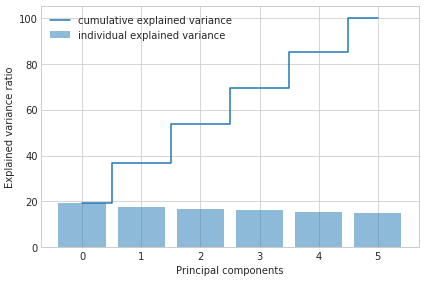



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.123500    7.444253  -34.743591  -3.752699 -0.143372   3.542436   
V2  7000.0  0.195404    7.857495  -35.831585  -3.716138  0.082825   3.999705   
V3  7000.0  0.215681    5.188734  -28.057705  -1.852990  0.061605   2.326751   
V4  7000.0  2.426658  135.866681 -510.600555 -79.720184  3.923081  85.614540   
V5  7000.0  3.227180  139.483437 -477.643921 -81.000599  2.214888  88.550653   
V6  7000.0  4.216194  112.509004 -410.630920 -69.764906  1.920492  77.812210   

           max  
V1   38.478073  
V2   52.646419  
V3   44.744755  
V4  472.739746  
V5  561.162476  
V6  479.209686  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0 -1.490871e-18  1.000071 -4.650912 -0.487552 -0.002670  0.492487   
1  7000.0 -1.871519e-17  1.000071 -4.585375 -0.497846 -0.014329  0.484197   
2  7000.0 -7.303681e-18  1

<Figure size 432x288 with 0 Axes>

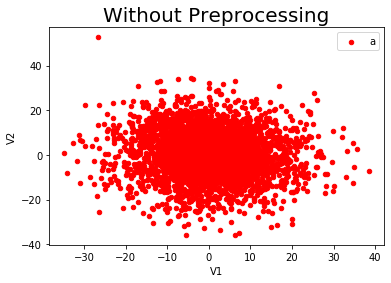

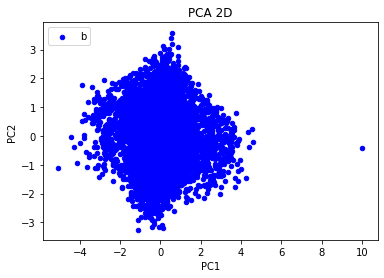

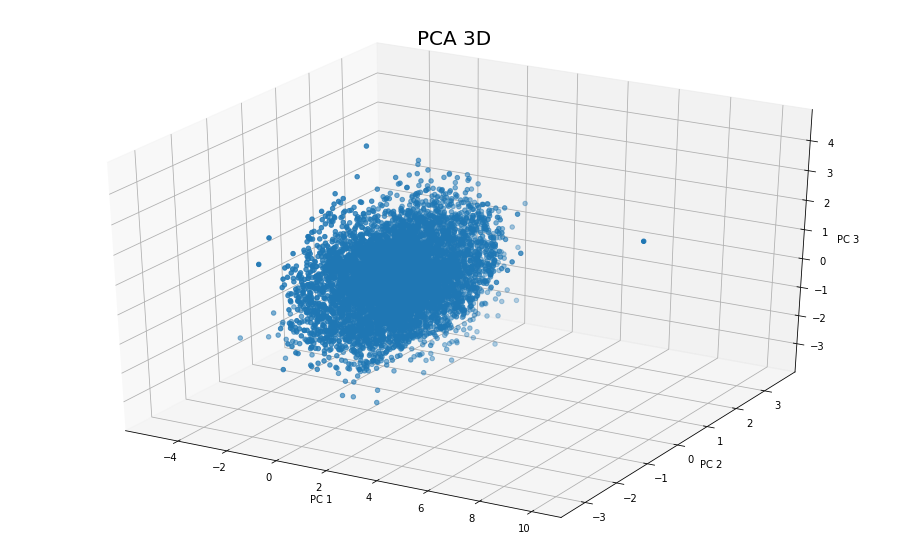

In [51]:
eigenPCA6D(X_sample1,'1')

Sample 2


1. Variance Explained
 [18.396577242313224, 17.911395663092787, 16.59586471705287, 16.29335116549264, 15.469425377359109, 15.33338583468936]


2. Cumulative Variance Explained
 [ 18.39657724  36.30797291  52.90383762  69.19718879  84.66661417
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.396577242313224, 17.911395663092787]


4. Percentage of variance the first two principal components together contain
 36.30797290540601


4. Percentage of variance the first 6 principal components together contain
 99.99999999999997


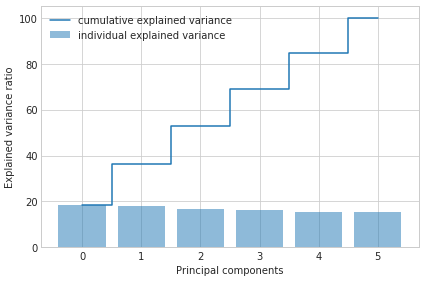



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.102327    7.416052  -34.003918  -3.793828 -0.160198   3.481123   
V2  7000.0 -0.048720    7.875724  -33.809578  -3.884560  0.013212   3.853688   
V3  7000.0  0.216508    5.229760  -25.903950  -1.883920  0.113184   2.457806   
V4  7000.0 -0.477137  134.098672 -495.390411 -83.023262  0.446404  79.773432   
V5  7000.0  2.540674  140.191346 -480.698059 -82.713528  3.138129  88.466349   
V6  7000.0  2.704288  113.041598 -474.250458 -71.154821  0.584412  73.061241   

           max  
V1   36.318600  
V2   52.766434  
V3   26.635731  
V4  485.243896  
V5  525.405396  
V6  468.693176  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0 -1.538452e-17  1.000071 -4.571707 -0.497807 -0.007804  0.483236   
1  7000.0 -6.026925e-19  1.000071 -4.287005 -0.487081  0.007864  0.495534   
2  7000.0  2.907198e-17  1

<Figure size 432x288 with 0 Axes>

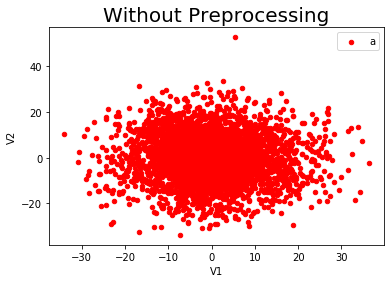

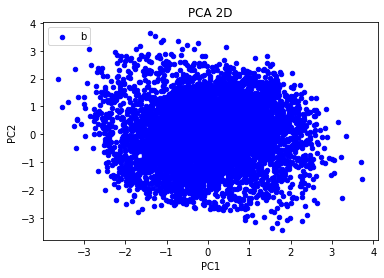

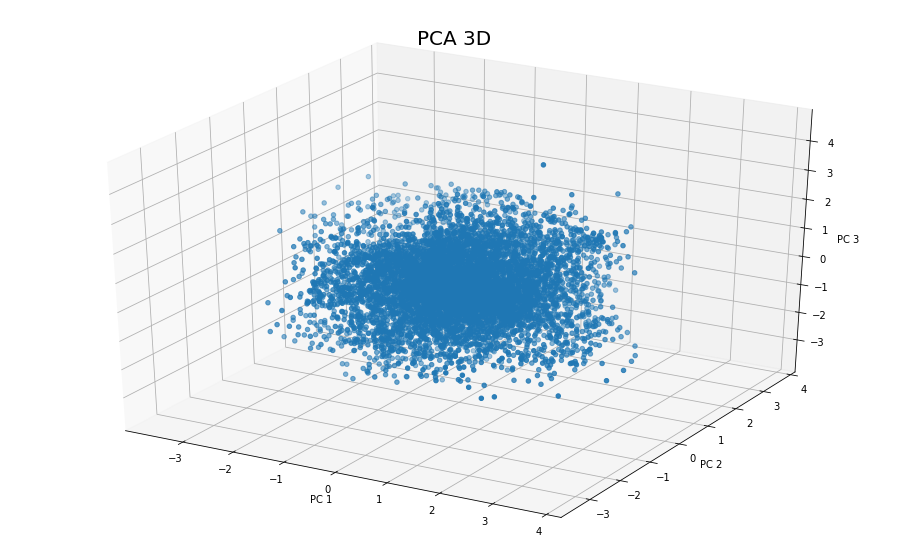

In [52]:
eigenPCA6D(X_sample2,'2')

Sample 3


1. Variance Explained
 [18.69492181823305, 17.843592234482728, 16.81754848700018, 15.707612763353444, 15.586977537352364, 15.349347159578233]


2. Cumulative Variance Explained
 [ 18.69492182  36.53851405  53.35606254  69.0636753   84.65065284
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.69492181823305, 17.843592234482728]


4. Percentage of variance the first two principal components together contain
 36.538514052715776


4. Percentage of variance the first 6 principal components together contain
 100.0


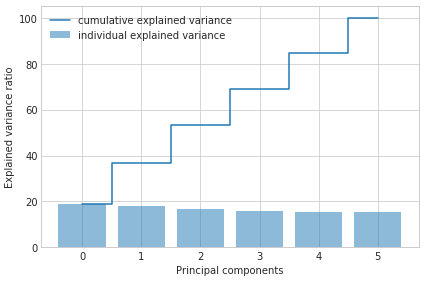



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0  0.104778    7.446075  -36.274921  -3.561612  0.067862   3.819003   
V2  7000.0 -0.118353    7.868812  -35.781864  -3.915803 -0.061044   3.790162   
V3  7000.0  0.277280    5.191027  -27.479864  -1.796076  0.097728   2.471540   
V4  7000.0  1.741988  135.133723 -509.357056 -80.485615  1.838291  84.170736   
V5  7000.0 -0.128720  138.168757 -534.785095 -84.128414 -0.815173  86.086296   
V6  7000.0  2.874660  111.351429 -467.708496 -70.407486  0.855736  75.936632   

           max  
V1   49.475113  
V2   35.745560  
V3   27.859755  
V4  494.623047  
V5  515.076660  
V6  487.212585  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0  6.502735e-18  1.000071 -4.886104 -0.492428 -0.004958  0.498852   
1  7000.0 -1.357644e-17  1.000071 -4.532585 -0.482630  0.007284  0.496745   
2  7000.0 -1.202411e-17  1

<Figure size 432x288 with 0 Axes>

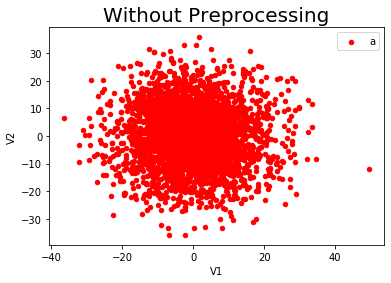

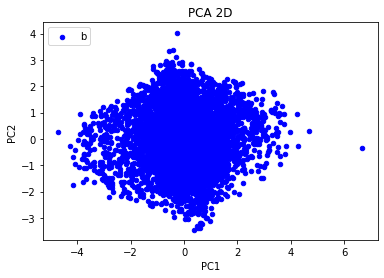

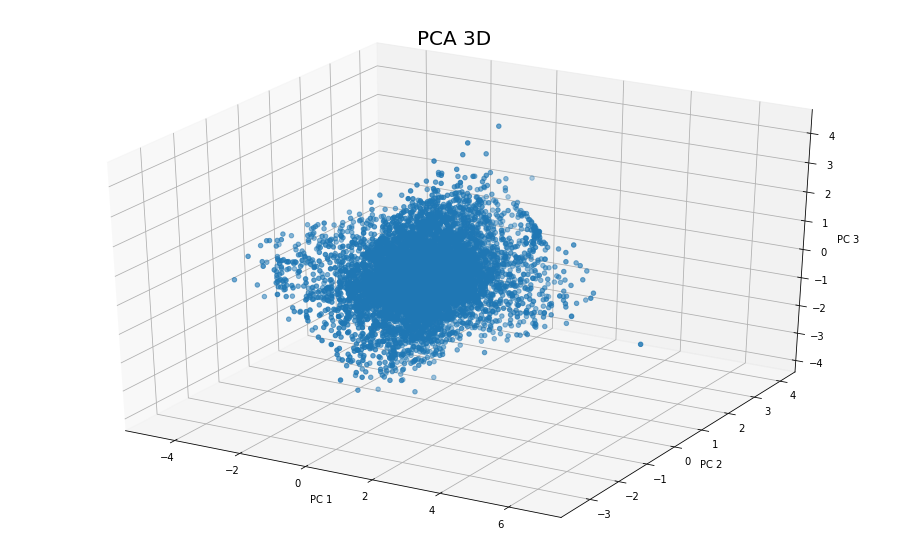

In [53]:
eigenPCA6D(X_sample3,'3')

Sample 4


1. Variance Explained
 [18.779008479947638, 17.91540423346213, 16.817297266912007, 16.060491695308755, 15.676760425870576, 14.751037898498895]


2. Cumulative Variance Explained
 [ 18.77900848  36.69441271  53.51170998  69.57220168  85.2489621
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.779008479947638, 17.91540423346213]


4. Percentage of variance the first two principal components together contain
 36.69441271340977


4. Percentage of variance the first 6 principal components together contain
 100.00000000000001


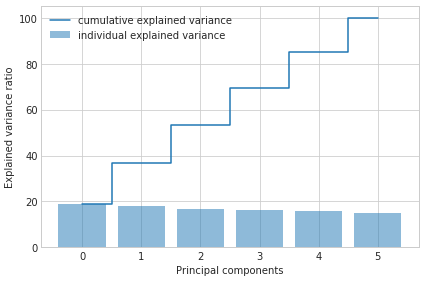



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.191573    7.304022  -34.233993  -3.880518 -0.240434   3.553592   
V2  7000.0 -0.007923    7.964517  -35.743374  -3.887384  0.024400   3.815999   
V3  7000.0  0.239070    5.397222  -28.562550  -1.893968  0.112663   2.510425   
V4  7000.0 -1.151008  134.974101 -510.600555 -84.919384 -0.169081  83.271442   
V5  7000.0  1.947320  137.406256 -511.157959 -81.527388  4.288507  87.842228   
V6  7000.0  0.182640  111.685545 -487.720581 -72.244480 -0.922733  73.567772   

           max  
V1   34.662869  
V2   35.209904  
V3   26.440201  
V4  504.151978  
V5  561.162476  
V6  413.669373  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0 -9.992007e-18  1.000071 -4.661110 -0.505093 -0.006690  0.512790   
1  7000.0  1.855658e-18  1.000071 -4.487153 -0.487128  0.004059  0.480154   
2  7000.0 -1.402053e-17  1

<Figure size 432x288 with 0 Axes>

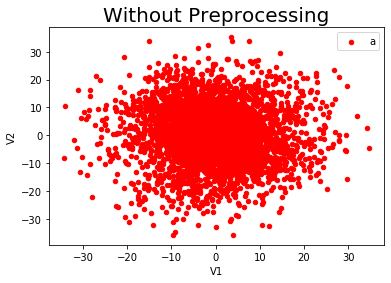

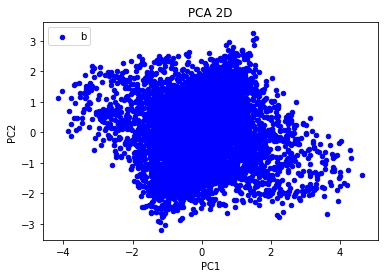

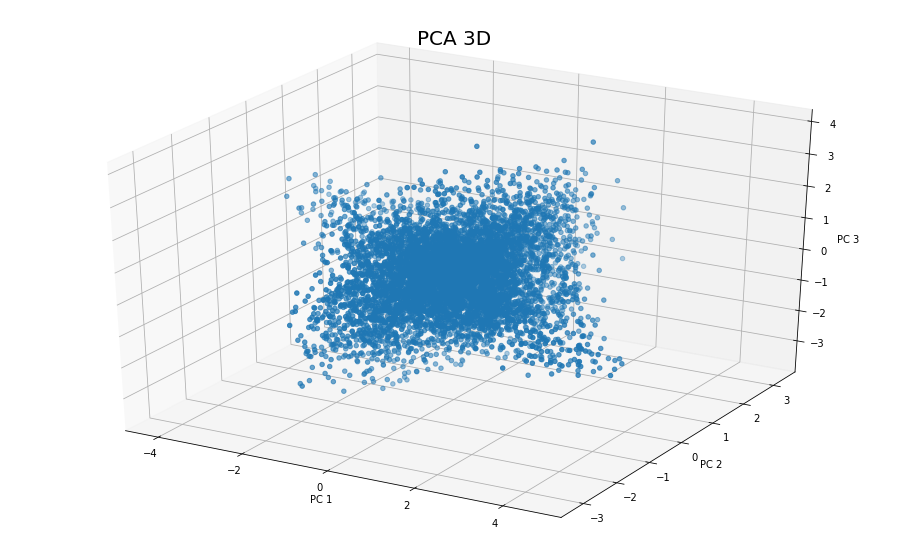

In [54]:
eigenPCA6D(X_sample4,'4')

Sample 5


1. Variance Explained
 [18.47899097731876, 17.85240324407639, 16.45423035484604, 16.07026149002695, 15.631490904255335, 15.512623029476536]


2. Cumulative Variance Explained
 [ 18.47899098  36.33139422  52.78562458  68.85588607  84.48737697
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.47899097731876, 17.85240324407639]


4. Percentage of variance the first two principal components together contain
 36.33139422139514


4. Percentage of variance the first 6 principal components together contain
 100.0


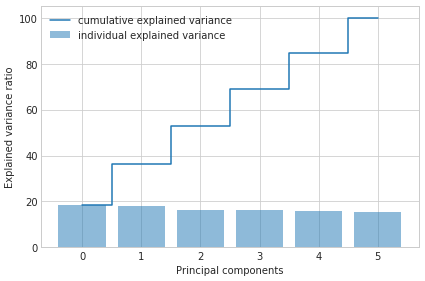



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.055625    7.285205  -34.743591  -3.700618 -0.029442   3.608579   
V2  7000.0  0.094586    7.885087  -35.780205  -3.745682  0.037566   3.963905   
V3  7000.0  0.280995    5.213505  -25.612886  -1.786287  0.106999   2.470128   
V4  7000.0 -4.006214  134.430515 -539.264648 -85.442686 -4.607479  78.556620   
V5  7000.0  4.823355  138.162679 -541.804993 -80.024952  5.400626  91.138088   
V6  7000.0  1.408016  112.101086 -431.221313 -72.414009 -1.077775  72.259590   

           max  
V1   34.439693  
V2   37.068619  
V3   27.513228  
V4  486.410156  
V5  619.157837  
V6  447.984985  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0  4.651438e-17  1.000071 -4.761766 -0.500364  0.003594  0.503001   
1  7000.0  1.213315e-17  1.000071 -4.550027 -0.487064 -0.007232  0.490749   
2  7000.0  2.561443e-17  1

<Figure size 432x288 with 0 Axes>

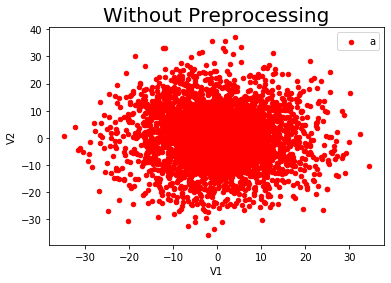

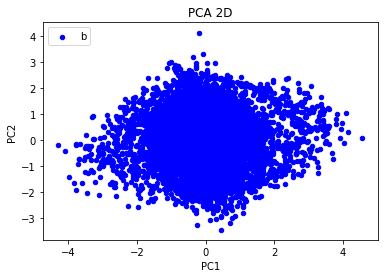

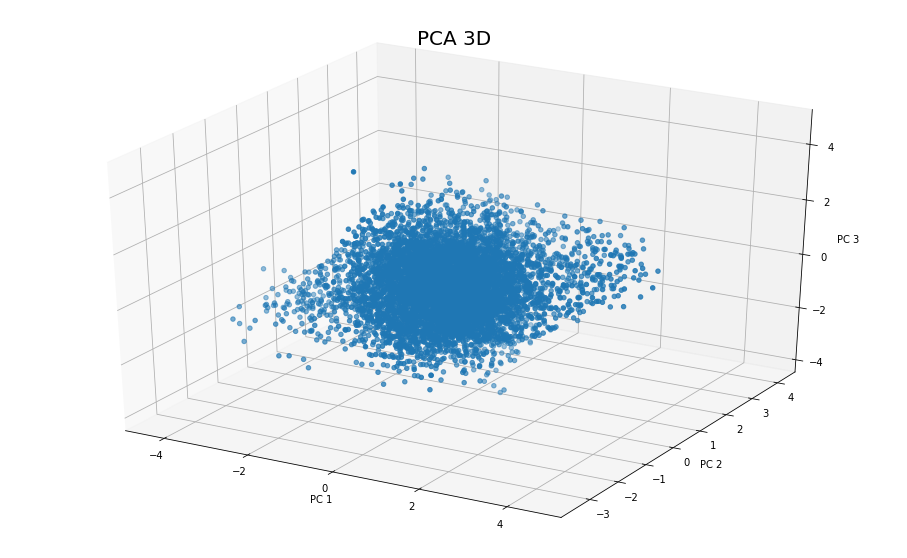

In [55]:
eigenPCA6D(X_sample5,'5')

Sample 6


1. Variance Explained
 [18.380865860961602, 17.790713808591182, 17.020113642901364, 16.031307844176045, 15.487470692246088, 15.289528151123708]


2. Cumulative Variance Explained
 [ 18.38086586  36.17157967  53.19169331  69.22300116  84.71047185
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.380865860961602, 17.790713808591182]


4. Percentage of variance the first two principal components together contain
 36.171579669552784


4. Percentage of variance the first 6 principal components together contain
 99.99999999999999


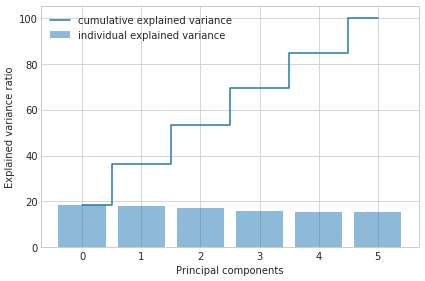



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.046853    7.475309  -33.499386  -3.706236 -0.089044   3.670968   
V2  7000.0 -0.154376    7.819629  -34.604099  -3.955439 -0.114313   3.710615   
V3  7000.0  0.199800    5.359076  -25.764830  -1.917049  0.097024   2.439008   
V4  7000.0 -0.608589  134.732838 -544.633850 -83.583696  0.502105  84.280664   
V5  7000.0  3.002381  140.210991 -570.877197 -81.154333  2.977272  91.388420   
V6  7000.0  1.408606  112.533586 -416.751526 -71.597452  2.978670  73.961445   

           max  
V1   44.084377  
V2   41.970772  
V3   54.372753  
V4  548.775879  
V5  493.196289  
V6  487.507690  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0 -2.283887e-17  1.000071 -4.475390 -0.489564 -0.005645  0.497382   
1  7000.0 -4.088793e-17  1.000071 -4.405859 -0.486127  0.005124  0.494303   
2  7000.0 -1.249001e-18  1

<Figure size 432x288 with 0 Axes>

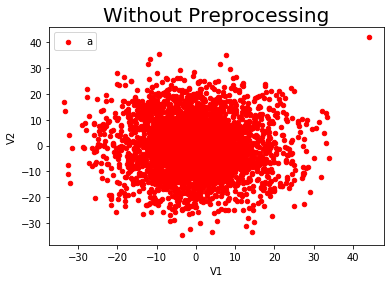

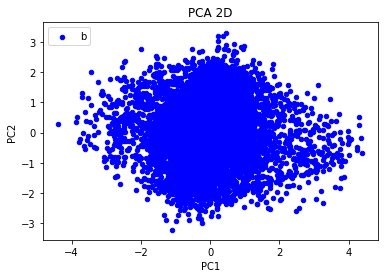

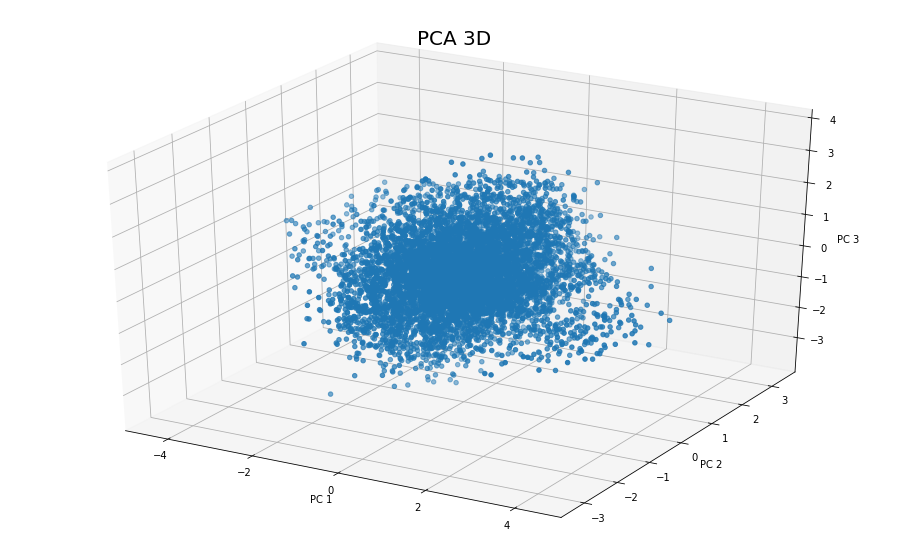

In [56]:
eigenPCA6D(X_sample6,'6')

Sample 7


1. Variance Explained
 [18.338279339220776, 17.904709870760698, 16.476800544973884, 16.101469583587658, 15.903040480805958, 15.27570018065104]


2. Cumulative Variance Explained
 [ 18.33827934  36.24298921  52.71978975  68.82125934  84.72429982
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.338279339220776, 17.904709870760698]


4. Percentage of variance the first two principal components together contain
 36.242989209981474


4. Percentage of variance the first 6 principal components together contain
 100.00000000000001


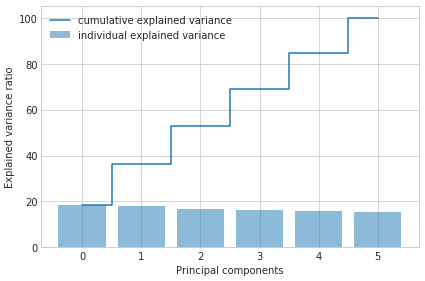



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.117747    7.601220  -32.239513  -3.850375 -0.073733   3.649558   
V2  7000.0 -0.186993    7.963839  -36.100864  -3.979188 -0.011165   3.692447   
V3  7000.0  0.203391    5.366514  -27.982029  -1.994024  0.073975   2.351995   
V4  7000.0  0.397229  135.373307 -524.454590 -84.392433  2.354992  82.624319   
V5  7000.0  3.117457  136.685882 -461.559631 -79.843716  0.610140  86.236607   
V6  7000.0  2.622226  112.072512 -423.752197 -70.907423  3.233315  74.899742   

           max  
V1   34.671566  
V2   36.631596  
V3   27.915592  
V4  520.196899  
V5  501.648621  
V6  442.942383  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0  2.926231e-18  1.000071 -4.226172 -0.491092  0.005791  0.495654   
1  7000.0 -4.286650e-17  1.000071 -4.509940 -0.476211  0.022080  0.487167   
2  7000.0 -7.787422e-18  1

<Figure size 432x288 with 0 Axes>

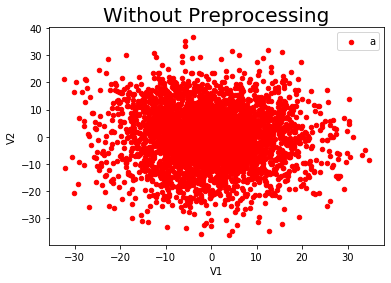

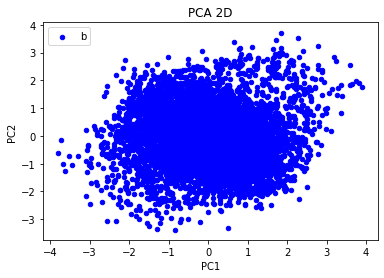

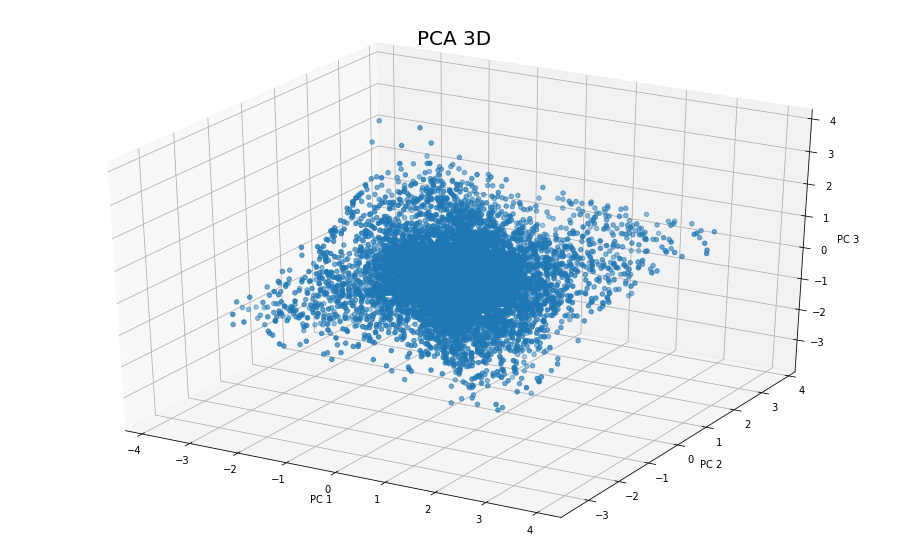

In [57]:
eigenPCA6D(X_sample7,'7')

Sample 8


1. Variance Explained
 [18.120724040600752, 17.732894365423952, 16.542701602991155, 16.20122547063538, 15.969744480978465, 15.432710039370287]


2. Cumulative Variance Explained
 [ 18.12072404  35.85361841  52.39632001  68.59754548  84.56728996
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.120724040600752, 17.732894365423952]


4. Percentage of variance the first two principal components together contain
 35.85361840602471


4. Percentage of variance the first 6 principal components together contain
 100.0


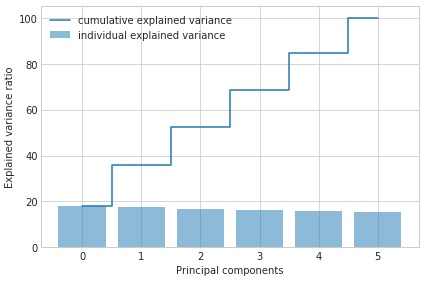



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.082519    7.549304  -34.671154  -3.847233 -0.160057   3.580689   
V2  7000.0 -0.198365    7.966501  -35.490765  -4.114213 -0.177239   3.633726   
V3  7000.0  0.334093    5.241116  -27.334272  -1.787189  0.118047   2.377102   
V4  7000.0  0.452696  134.484656 -583.536072 -79.015865  1.144272  81.436554   
V5  7000.0  5.464654  138.602012 -585.124512 -77.997305  5.706909  88.754038   
V6  7000.0  2.364749  111.826161 -470.854248 -71.197245  1.489583  73.025015   

           max  
V1   34.803894  
V2   37.277153  
V3   26.324749  
V4  475.555939  
V5  561.162476  
V6  458.337708  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0  3.378250e-17  1.000071 -4.582026 -0.498719 -0.010272  0.485273   
1  7000.0  2.658984e-17  1.000071 -4.430417 -0.491574  0.002652  0.481060   
2  7000.0  1.838212e-17  1

<Figure size 432x288 with 0 Axes>

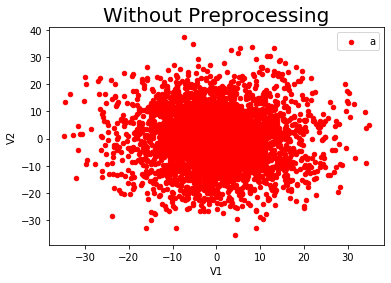

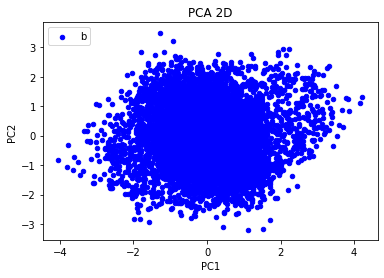

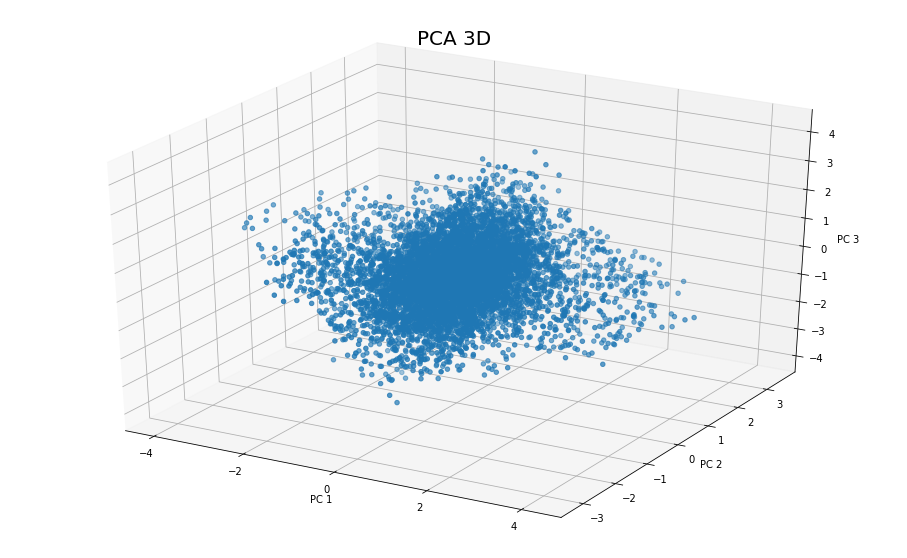

In [58]:
eigenPCA6D(X_sample8,'8')

Sample 9


1. Variance Explained
 [18.65343764549031, 17.993865595983095, 16.274405637078512, 16.05362091351156, 15.767871624303423, 15.25679858363311]


2. Cumulative Variance Explained
 [ 18.65343765  36.64730324  52.92170888  68.97532979  84.74320142
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.65343764549031, 17.993865595983095]


4. Percentage of variance the first two principal components together contain
 36.64730324147341


4. Percentage of variance the first 6 principal components together contain
 100.00000000000003


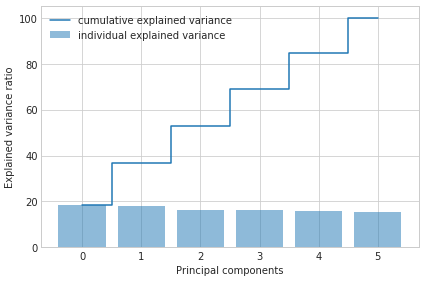



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.134312    7.705527  -54.923138  -3.876018 -0.159802   3.540215   
V2  7000.0 -0.013292    7.792282  -32.842571  -3.753467 -0.047144   3.736186   
V3  7000.0  0.206821    5.290471  -24.014401  -1.935791  0.131442   2.518026   
V4  7000.0 -0.011855  136.121675 -492.115601 -83.544909  1.075211  81.725658   
V5  7000.0  1.385744  139.487646 -604.914612 -85.045509  2.636319  88.672300   
V6  7000.0  1.412207  112.826386 -463.376282 -75.097088  1.096702  77.554956   

           max  
V1   63.635433  
V2   35.745560  
V3   28.236359  
V4  509.287811  
V5  542.635010  
V6  444.984192  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0  8.342533e-18  1.000071 -7.110836 -0.485622 -0.003308  0.476903   
1  7000.0 -1.130048e-17  1.000071 -4.213352 -0.480019 -0.004345  0.481213   
2  7000.0 -5.530497e-17  1

In [136]:
eigenPCA6D(X_sample9,'9')

Sample 10


1. Variance Explained
 [18.32061317313211, 17.602162364397543, 16.780201617475708, 16.229451329956124, 15.746220079713774, 15.32135143532475]


2. Cumulative Variance Explained
 [ 18.32061317  35.92277554  52.70297716  68.93242848  84.67864856
 100.        ]


3. Percentage of variance the first two principal components each contain
  [18.32061317313211, 17.602162364397543]


4. Percentage of variance the first two principal components together contain
 35.92277553752965


4. Percentage of variance the first 6 principal components together contain
 100.0


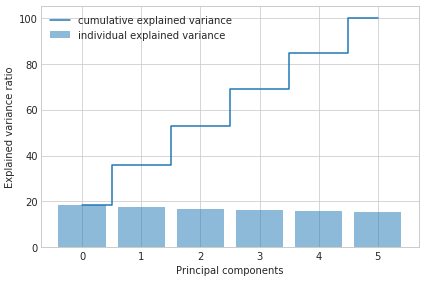



Mean, Standard Deviation

Without preprocessing:

     count      mean         std         min        25%       50%        75%  \
V1  7000.0 -0.248976    7.371805  -37.257225  -3.867320 -0.123340   3.563649   
V2  7000.0  0.075759    8.015379  -35.813538  -3.760286  0.038273   3.872812   
V3  7000.0  0.287653    5.336741  -27.971441  -1.859452  0.123652   2.426031   
V4  7000.0  1.632797  136.316150 -500.268433 -81.304607  1.789130  83.790457   
V5  7000.0  5.175875  138.051395 -457.316589 -81.860901  4.832545  92.225882   
V6  7000.0  1.613435  112.315396 -467.708496 -73.083778 -0.256116  74.579426   

           max  
V1   44.084377  
V2   41.970772  
V3   54.372753  
V4  478.766357  
V5  463.374817  
V6  487.507690  

Z-Score:

    count          mean       std       min       25%       50%       75%  \
0  7000.0 -9.799701e-18  1.000071 -5.020602 -0.490871  0.017044  0.517227   
1  7000.0 -6.447224e-18  1.000071 -4.477874 -0.478620 -0.004677  0.473755   
2  7000.0 -9.458704e-18  1

<Figure size 432x288 with 0 Axes>

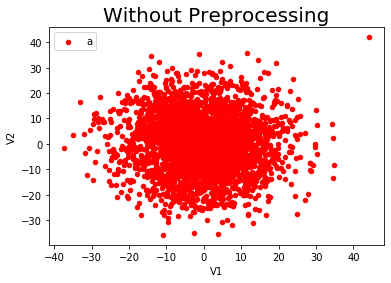

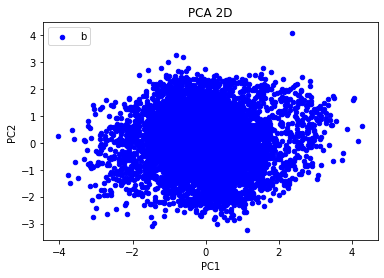

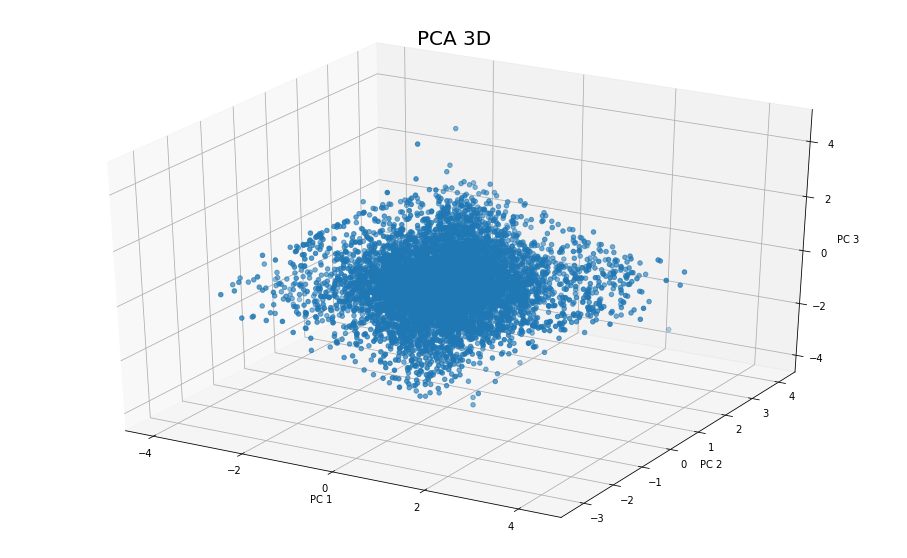

In [59]:
eigenPCA6D(X_sample10,'10')

### Perform Analysis for 3D samples

Sample 1
1. Variance Explained
 [58.95873730536714, 32.31760344835307, 8.723659246279803]


2. Cumulative Variance Explained
 [ 58.95873731  91.27634075 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.95873730536714, 32.31760344835307]


4. Percentage of variance the first two principal components together contain
 91.2763407537202


4. Percentage of variance the first 3 principal components together contain
 100.00000000000001


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107889.189914  31748.660361 -214745.062000 -131467.605750   
V2  7000.0     937.208101    668.996958      59.231606     427.914680   
V3  7000.0      42.342578    781.201351   -2847.758790    -307.706185   

              50%           75%          max  
V1 -109630.113500 -79971.855475 -21918.08590  
V2     746.725006   1230.728215   3574.00537  
V3     -34.888462    626.331330   

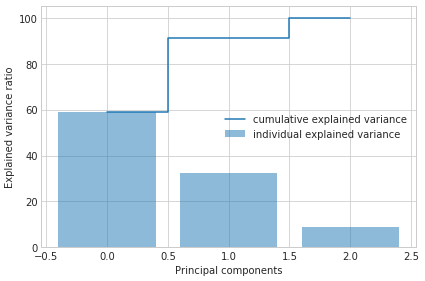

<Figure size 432x288 with 0 Axes>

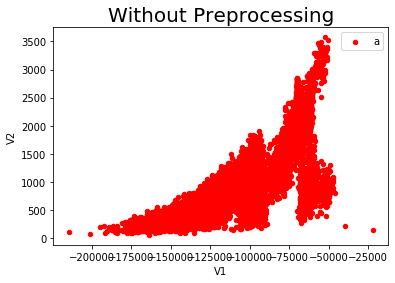

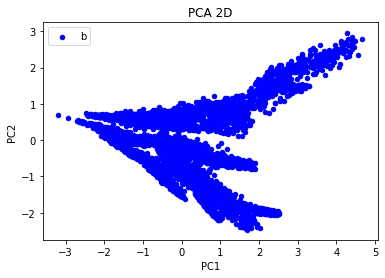

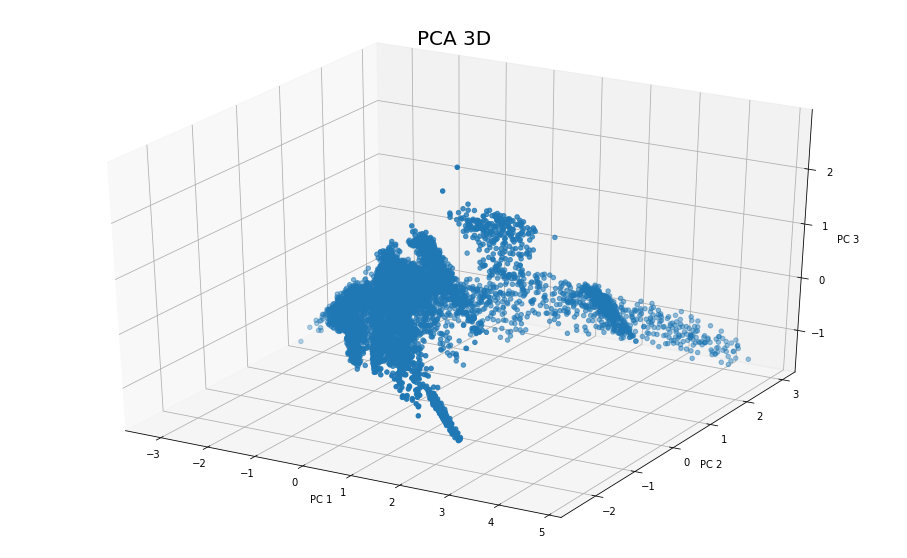

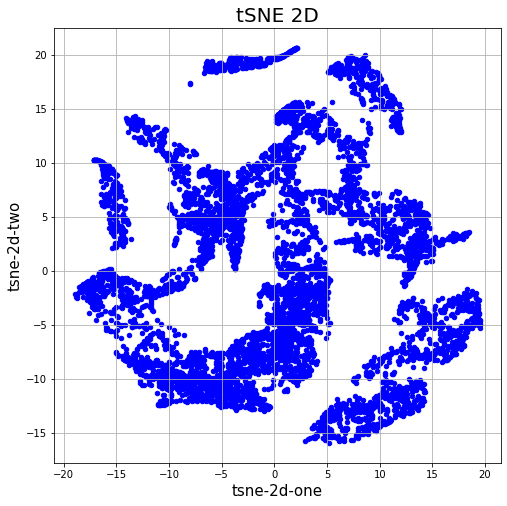

In [60]:
eigenPCA3D(Y_sample1,'1')

Sample 2
1. Variance Explained
 [58.81674993426296, 32.65488489061254, 8.528365175124494]


2. Cumulative Variance Explained
 [ 58.81674993  91.47163482 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.81674993426296, 32.65488489061254]


4. Percentage of variance the first two principal components together contain
 91.47163482487551


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107617.677118  31769.324598 -201823.141000 -131372.507750   
V2  7000.0     947.466246    670.650593      69.351509     427.796959   
V3  7000.0      53.703244    788.558287   -2825.614750    -301.439507   

              50%           75%          max  
V1 -107902.547000 -79352.519575 -26675.14060  
V2     758.093048   1253.643400   3662.72168  
V3      69.204323    639.873795   1711.58337  

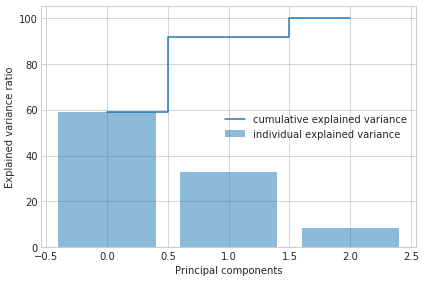

<Figure size 432x288 with 0 Axes>

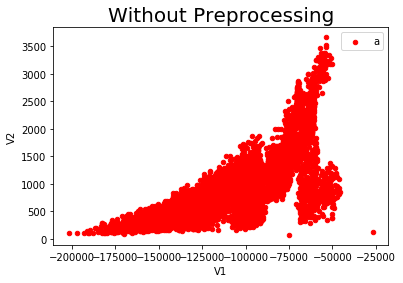

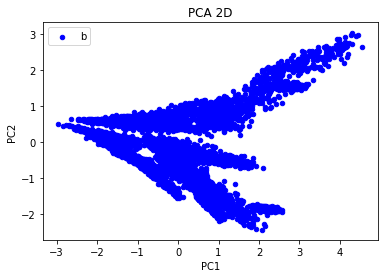

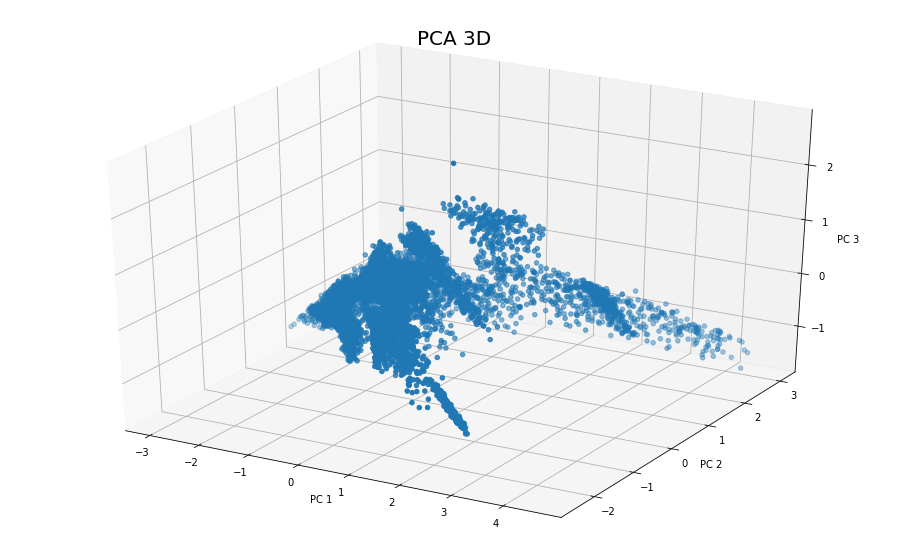

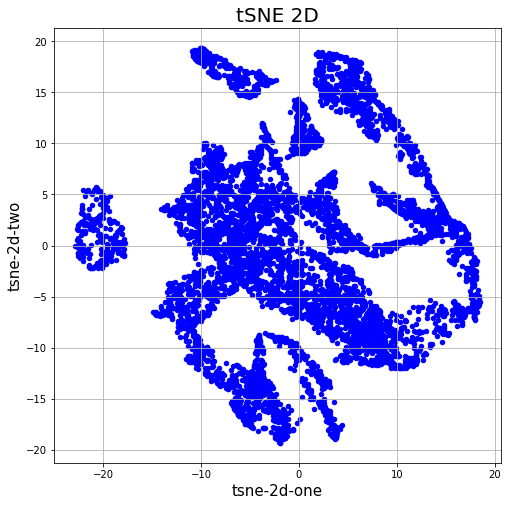

In [61]:
eigenPCA3D(Y_sample2,'2')

Sample 3
1. Variance Explained
 [58.479748361715636, 32.82342937135112, 8.696822266933243]


2. Cumulative Variance Explained
 [ 58.47974836  91.30317773 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.479748361715636, 32.82342937135112]


4. Percentage of variance the first two principal components together contain
 91.30317773306675


4. Percentage of variance the first 3 principal components together contain
 99.99999999999999


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107643.712727  31508.169116 -236678.812000 -131155.913750   
V2  7000.0     933.801104    655.385802      56.776508     421.735473   
V3  7000.0      51.694749    780.660366   -2872.198970    -308.898239   

              50%           75%          max  
V1 -109107.598000 -79755.158200 -13826.85840  
V2     757.728699   1239.403440   3517.33618  
V3     -90.285118    640.233413 

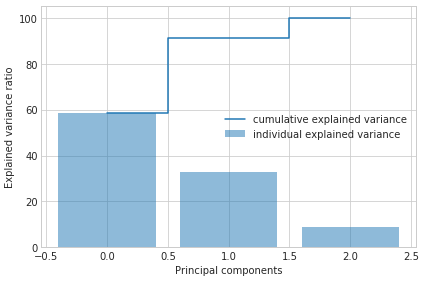

<Figure size 432x288 with 0 Axes>

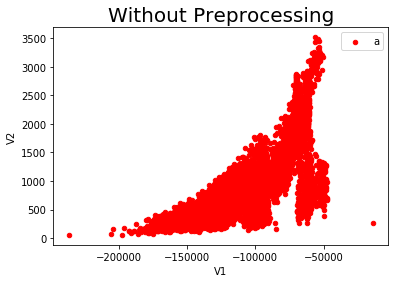

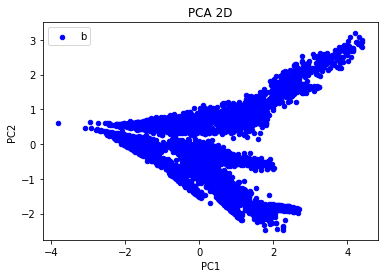

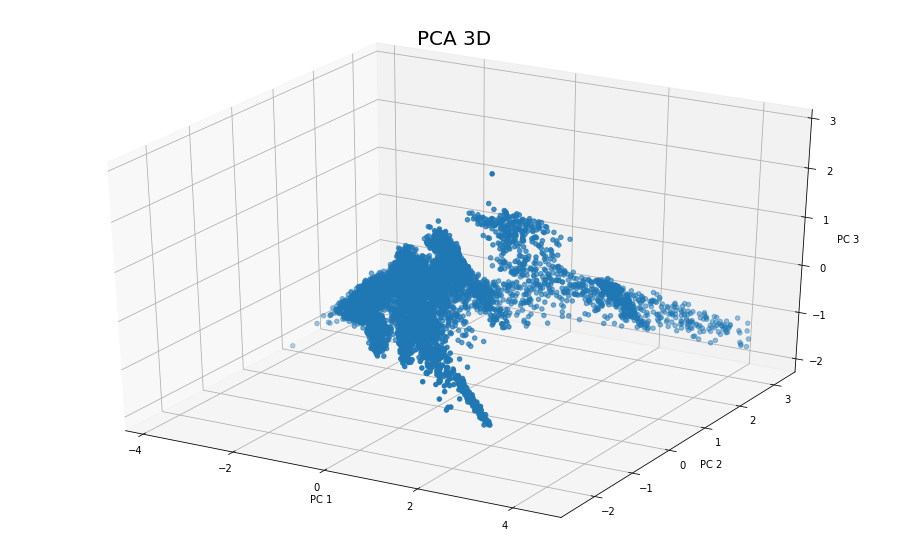

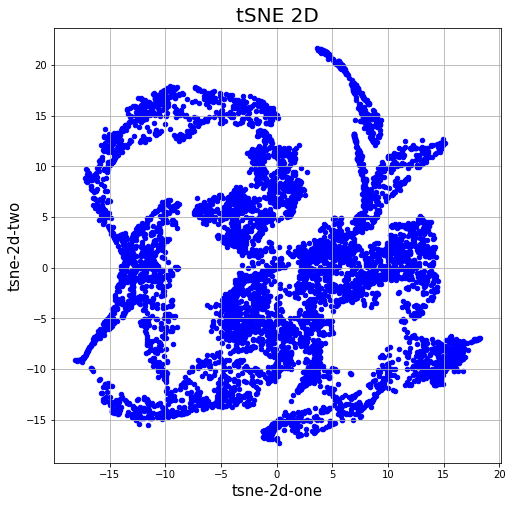

In [62]:
eigenPCA3D(Y_sample3,'3')

Sample 4
1. Variance Explained
 [58.87456347004068, 32.38017793256413, 8.745258597395203]


2. Cumulative Variance Explained
 [ 58.87456347  91.2547414  100.        ]


3. Percentage of variance the first two principal components each contain
  [58.87456347004068, 32.38017793256413]


4. Percentage of variance the first two principal components together contain
 91.25474140260481


4. Percentage of variance the first 3 principal components together contain
 100.00000000000001


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107473.545594  31712.090842 -211161.938000 -131273.691750   
V2  7000.0     944.460013    666.276697      26.189013     433.627625   
V3  7000.0      42.861365    788.887176   -2842.791500    -308.868973   

              50%           75%          max  
V1 -107951.773500 -79295.691400 -45395.60940  
V2     763.965973   1248.516448   3549.04712  
V3      45.271585    631.343063  

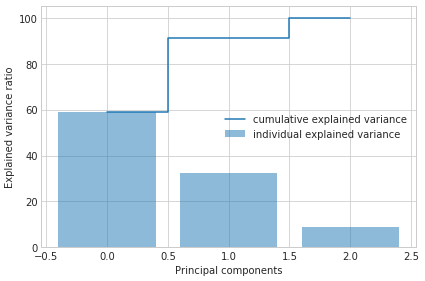

<Figure size 432x288 with 0 Axes>

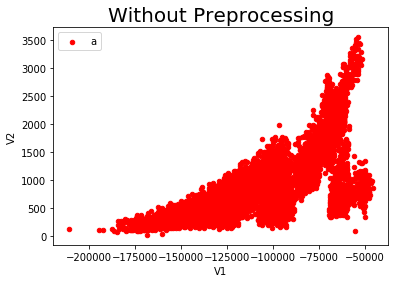

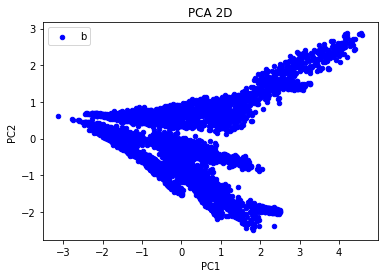

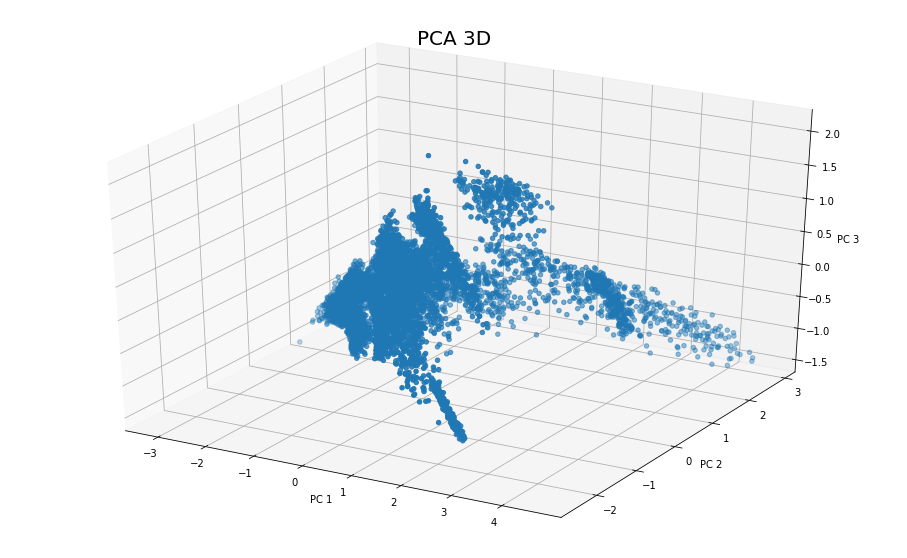

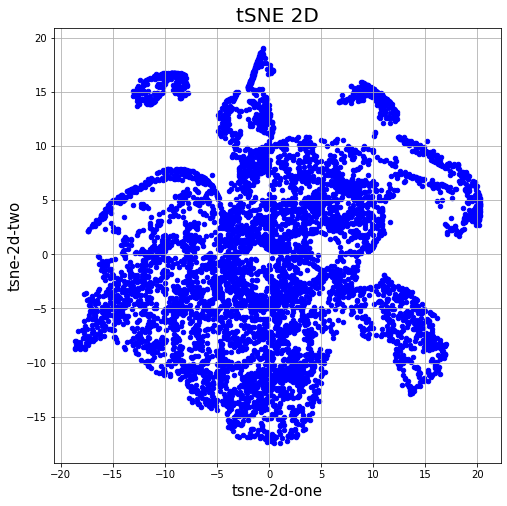

In [63]:
eigenPCA3D(Y_sample4,'4')

Sample 5
1. Variance Explained
 [58.92935944871088, 32.27063051418854, 8.800010037100577]


2. Cumulative Variance Explained
 [ 58.92935945  91.19998996 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.92935944871088, 32.27063051418854]


4. Percentage of variance the first two principal components together contain
 91.19998996289942


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107879.389479  31706.515629 -204026.375000 -131427.504250   
V2  7000.0     931.182446    658.217817      50.719257     427.436943   
V3  7000.0      34.567340    780.559739   -2682.041750    -313.794296   

              50%           75%          max  
V1 -109981.648500 -80027.863250 -13826.85840  
V2     755.734314   1227.092590   3609.50000  
V3    -106.228206    617.743668   1768.29956  

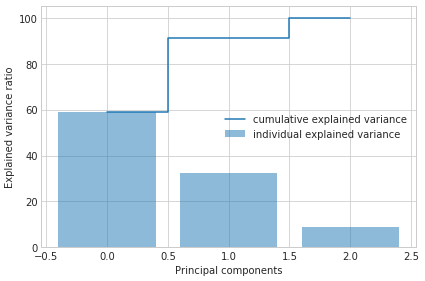

<Figure size 432x288 with 0 Axes>

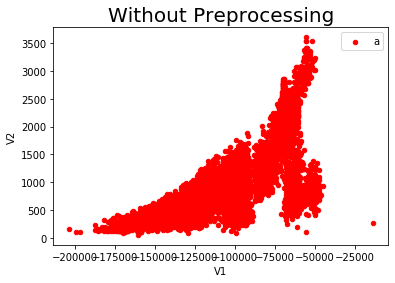

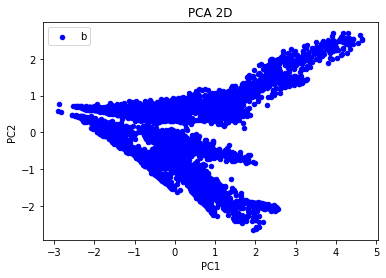

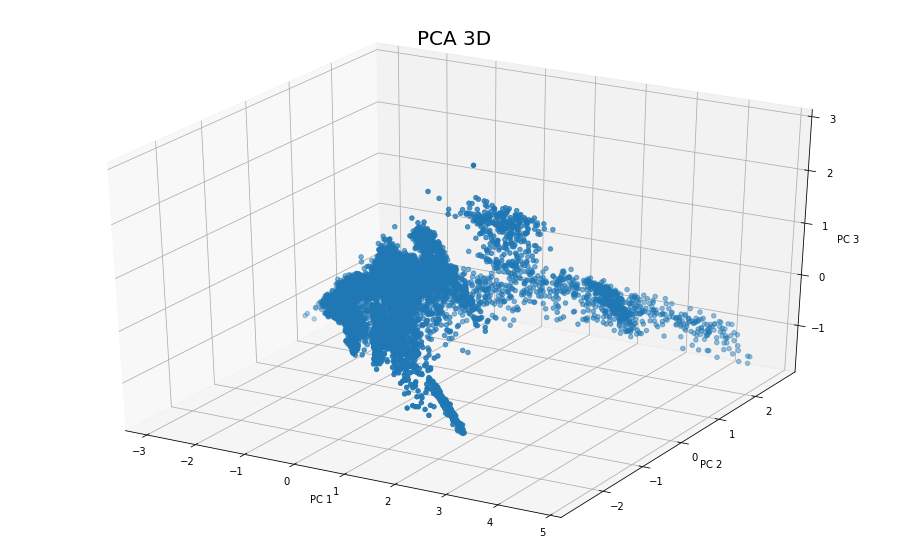

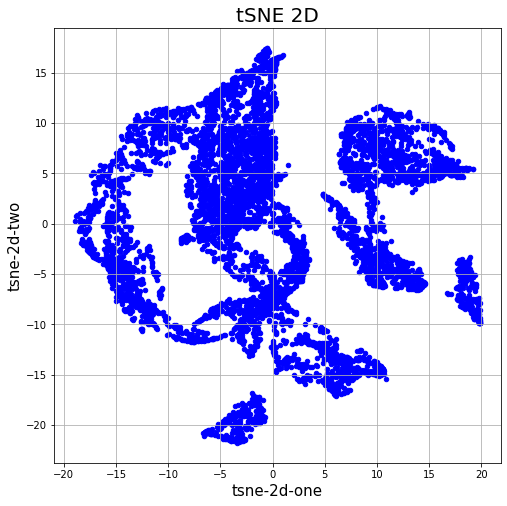

In [64]:
eigenPCA3D(Y_sample5,'5')

Sample 6
1. Variance Explained
 [58.78053381568957, 32.38733394715345, 8.832132237156976]


2. Cumulative Variance Explained
 [ 58.78053382  91.16786776 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.78053381568957, 32.38733394715345]


4. Percentage of variance the first two principal components together contain
 91.16786776284303


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107686.666950  31660.377171 -210665.062000 -130988.863000   
V2  7000.0     937.853949    666.445703      66.796341     430.591400   
V3  7000.0      37.692462    785.848374   -2750.982180    -315.306122   

              50%           75%          max  
V1 -110242.766000 -79697.853500 -17504.90820  
V2     755.033783   1226.678042   3549.42017  
V3    -104.000564    617.126572   1727.96460  

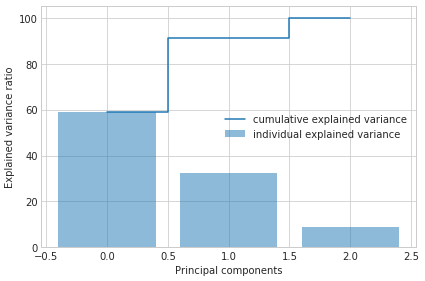

<Figure size 432x288 with 0 Axes>

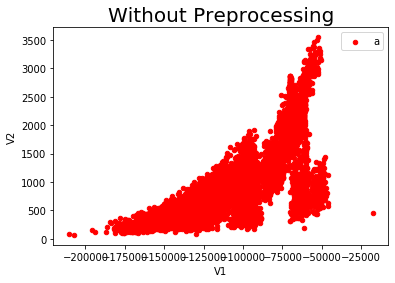

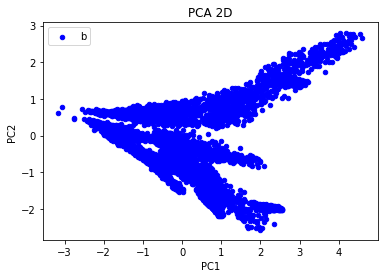

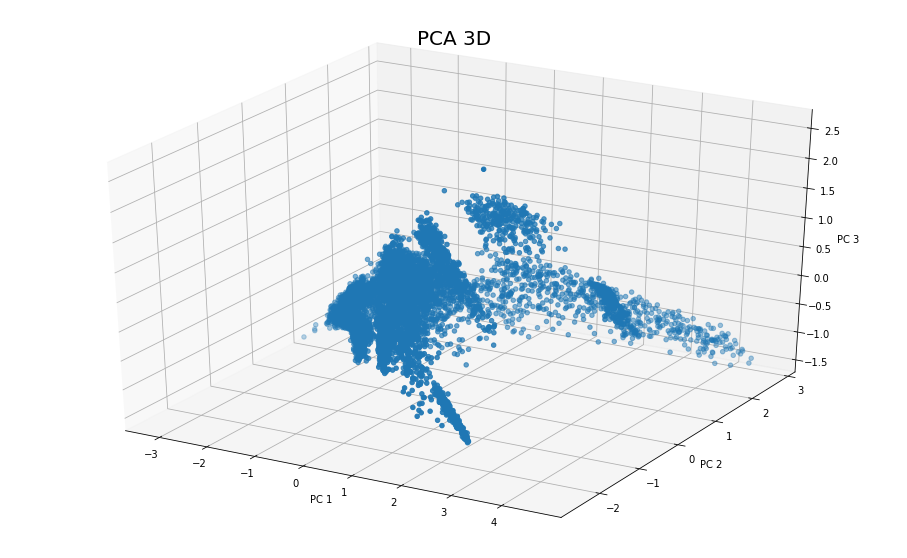

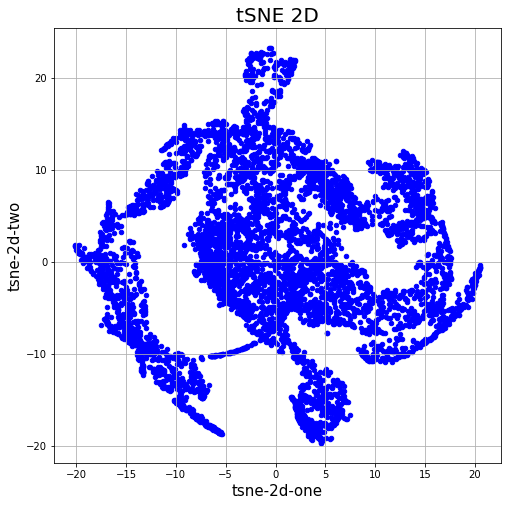

In [65]:
eigenPCA3D(Y_sample6,'6')

Sample 7
1. Variance Explained
 [58.70335819123154, 32.59170418201488, 8.704937626753582]


2. Cumulative Variance Explained
 [ 58.70335819  91.29506237 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.70335819123154, 32.59170418201488]


4. Percentage of variance the first two principal components together contain
 91.29506237324642


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107684.445453  31892.512913 -198025.594000 -131636.613250   
V2  7000.0     938.991572    667.118073      74.917442     429.327232   
V3  7000.0      49.620780    785.090123   -2771.385250    -308.267952   

              50%           75%          max  
V1 -108096.273500 -79601.841775 -45161.54690  
V2     754.662964   1241.974335   3501.52979  
V3      52.125875    630.629700   1733.92236  

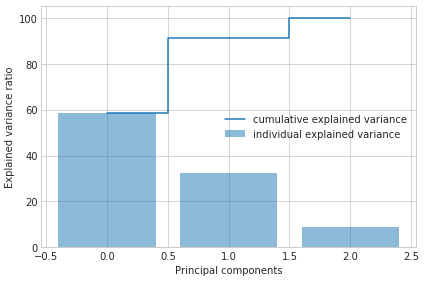

<Figure size 432x288 with 0 Axes>

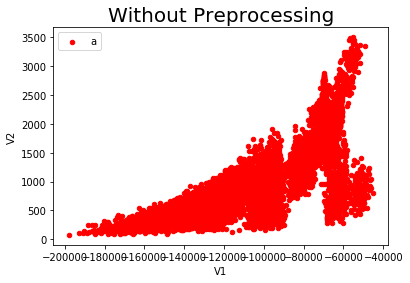

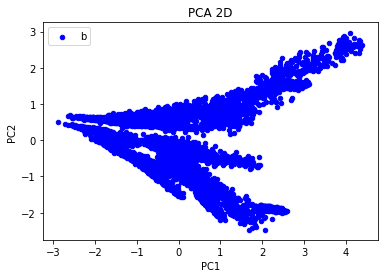

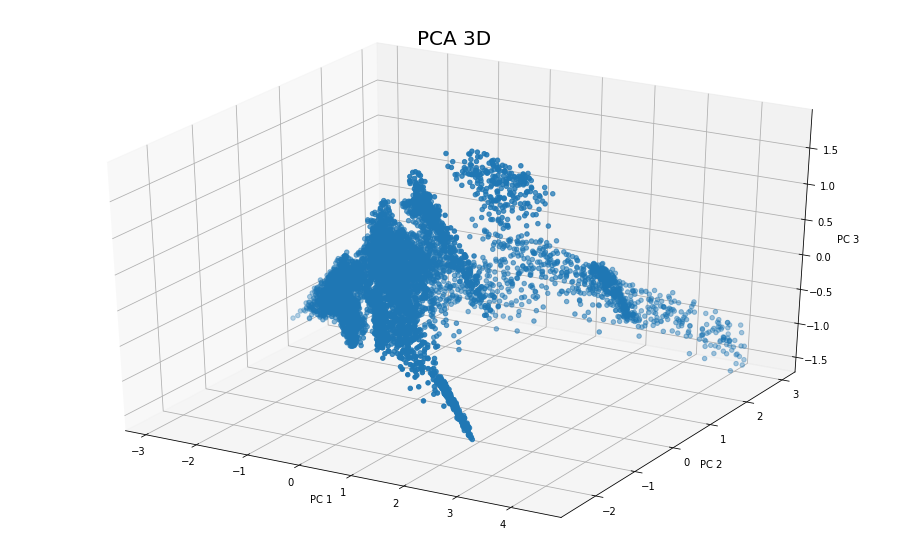

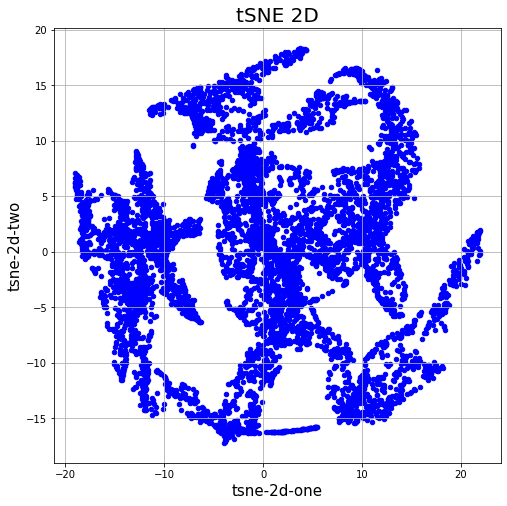

In [66]:
eigenPCA3D(Y_sample7,'7')

Sample 8
1. Variance Explained
 [58.778926080886286, 32.4210955118437, 8.799978407270013]


2. Cumulative Variance Explained
 [ 58.77892608  91.20002159 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.778926080886286, 32.4210955118437]


4. Percentage of variance the first two principal components together contain
 91.20002159273


4. Percentage of variance the first 3 principal components together contain
 100.00000000000001


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107192.781732  31608.883573 -189994.438000 -131349.066250   
V2  7000.0     938.929338    665.727315      82.864044     425.273033   
V3  7000.0      38.031967    785.854237   -2830.868410    -309.246727   

              50%           75%          max  
V1 -106524.207500 -79538.714800 -45677.53520  
V2     751.402405   1250.073697   3542.07251  
V3     -97.776135    615.349060   17

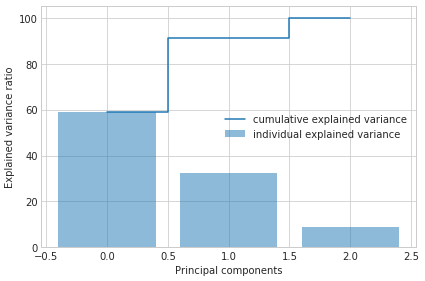

<Figure size 432x288 with 0 Axes>

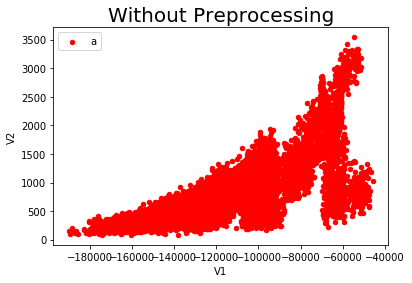

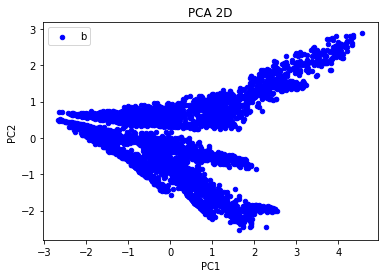

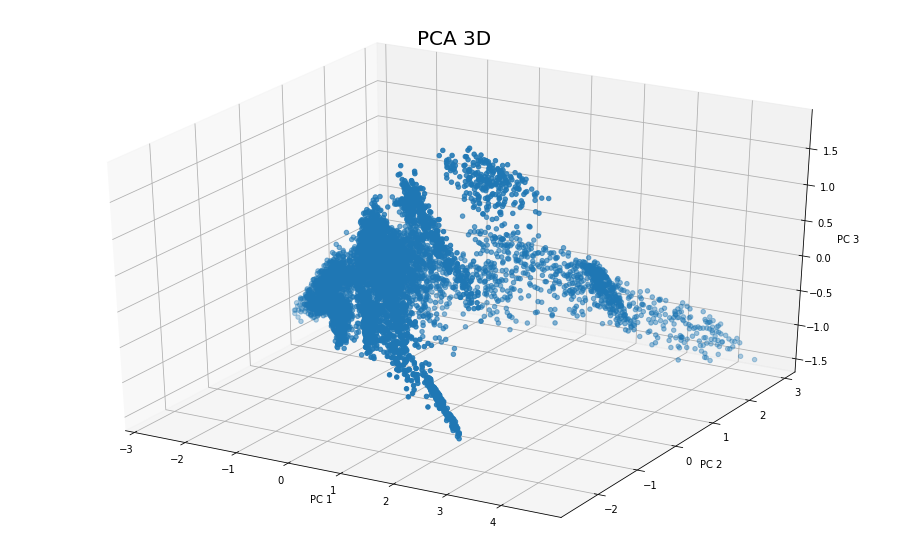

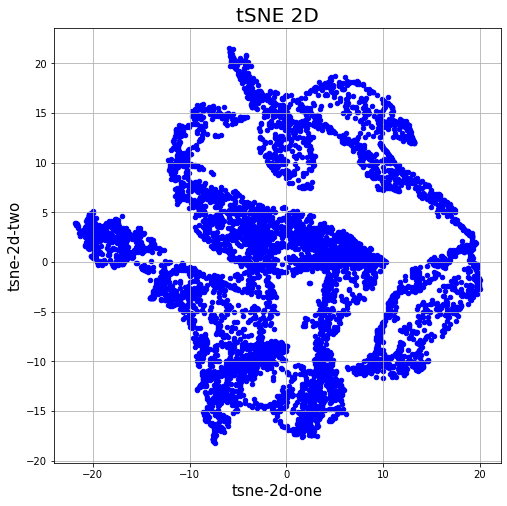

In [67]:
eigenPCA3D(Y_sample8,'8')

Sample 9
1. Variance Explained
 [59.361042307827084, 32.21355616016831, 8.425401532004592]


2. Cumulative Variance Explained
 [ 59.36104231  91.57459847 100.        ]


3. Percentage of variance the first two principal components each contain
  [59.361042307827084, 32.21355616016831]


4. Percentage of variance the first two principal components together contain
 91.5745984679954


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -108027.264443  31816.809972 -222561.391000 -131942.347250   
V2  7000.0     936.830726    668.547628      48.219849     424.445961   
V3  7000.0      44.478335    789.017927   -2863.844970    -301.944290   

              50%           75%          max  
V1 -109271.590000 -79777.441375 -45718.04300  
V2     747.288269   1233.984103   3608.47217  
V3      70.951969    626.973053   1695.13599 

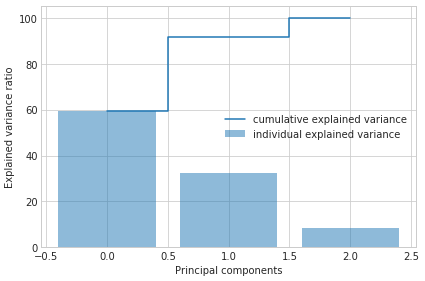

<Figure size 432x288 with 0 Axes>

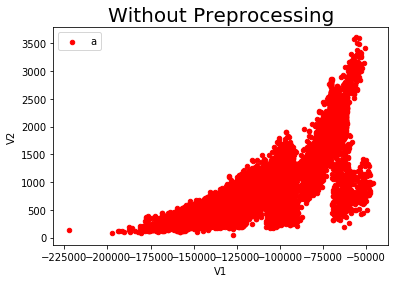

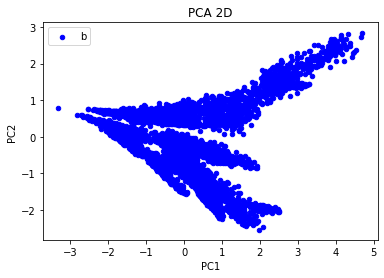

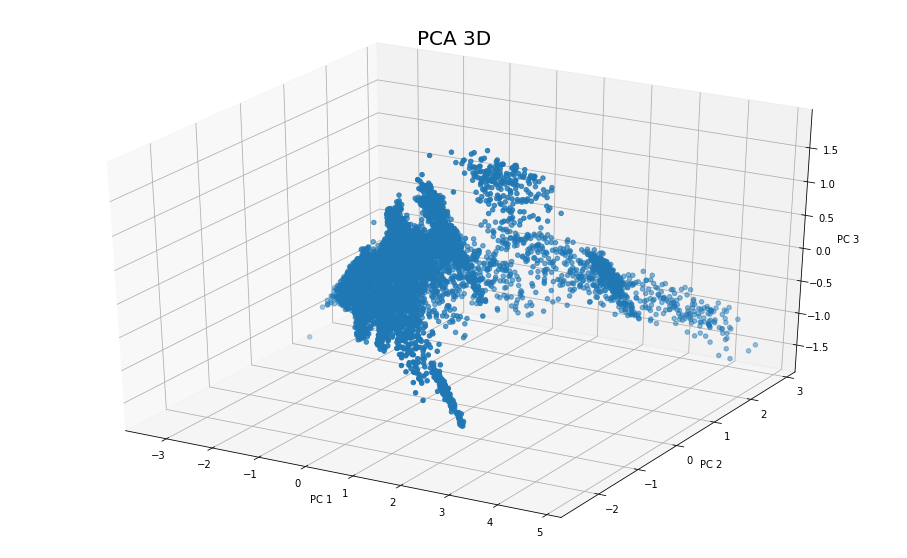

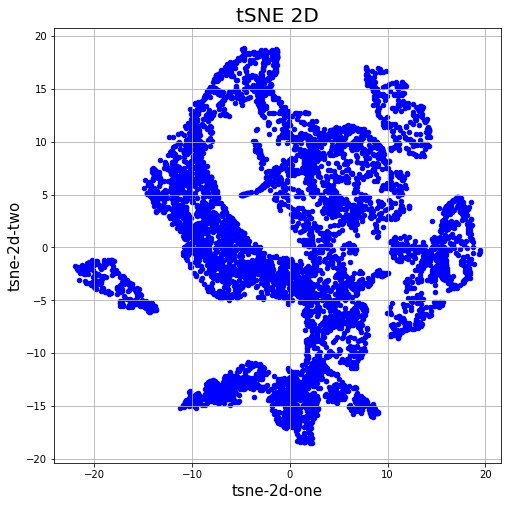

In [68]:
eigenPCA3D(Y_sample9,'9')

Sample 10
1. Variance Explained
 [59.46896704856256, 31.872468542742272, 8.658564408695169]


2. Cumulative Variance Explained
 [ 59.46896705  91.34143559 100.        ]


3. Percentage of variance the first two principal components each contain
  [59.46896704856256, 31.872468542742272]


4. Percentage of variance the first two principal components together contain
 91.34143559130483


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

     count           mean           std            min            25%  \
V1  7000.0 -107664.680524  31992.362029 -205438.391000 -131785.348000   
V2  7000.0     940.620901    669.955580      69.351509     424.461067   
V3  7000.0      31.161912    792.852783   -2872.198970    -311.311065   

              50%           75%          max  
V1 -108308.168000 -79402.087925 -29871.58590  
V2     759.128418   1249.148500   3608.47217  
V3     -33.523129    616.667740   1768.2995

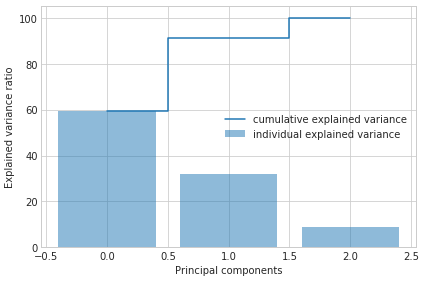

<Figure size 432x288 with 0 Axes>

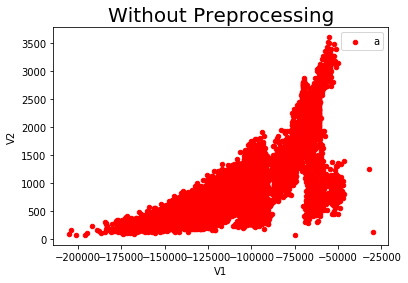

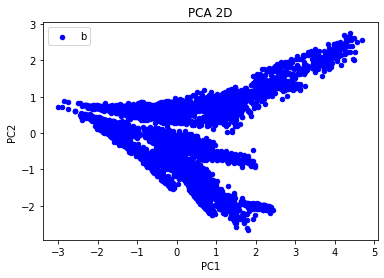

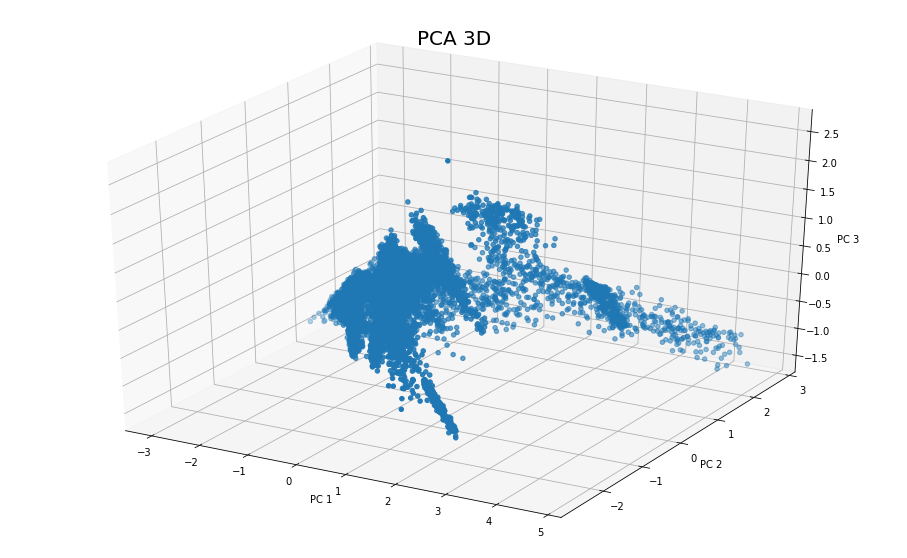

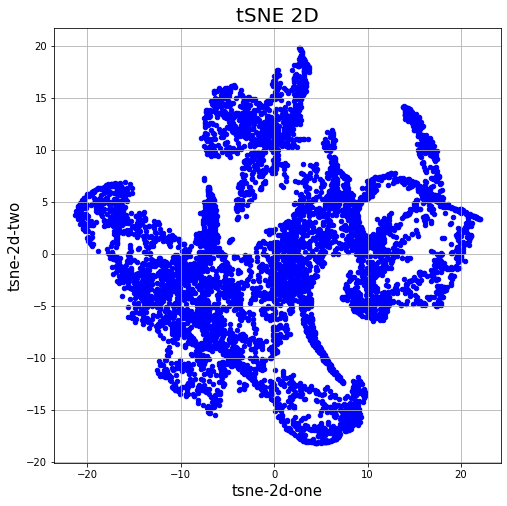

In [69]:
eigenPCA3D(Y_sample10,'10')

#### Complete Dataset

Sample Full
1. Variance Explained
 [58.94887531340285, 32.34734721472994, 8.7037774718672]


2. Cumulative Variance Explained
 [ 58.94887531  91.29622253 100.        ]


3. Percentage of variance the first two principal components each contain
  [58.94887531340285, 32.34734721472994]


4. Percentage of variance the first two principal components together contain
 91.2962225281328


4. Percentage of variance the first 3 principal components together contain
 100.0


Mean, Standard Deviation

Without preprocessing:

       count           mean           std            min            25%  \
V1  280000.0 -107599.456562  31780.063016 -253990.453000 -131483.922000   
V2  280000.0     940.463120    665.392566      26.189013     428.185433   
V3  280000.0      41.596176    786.098508   -2900.541260    -309.886085   

              50%           75%         max  
V1 -108274.934000 -79500.095725  1089.47278  
V2     757.436279   1246.538880  3743.65820  
V3     -30.309649    622.878418  1774.055

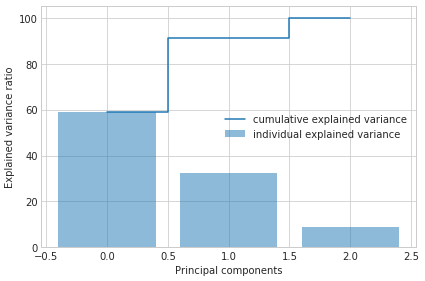

<Figure size 432x288 with 0 Axes>

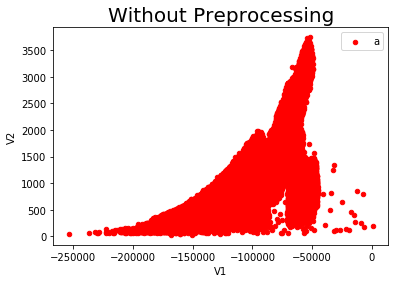

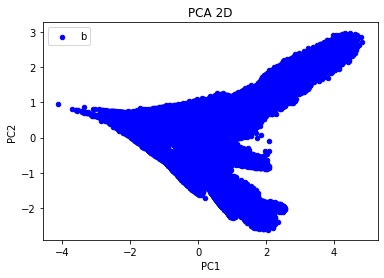

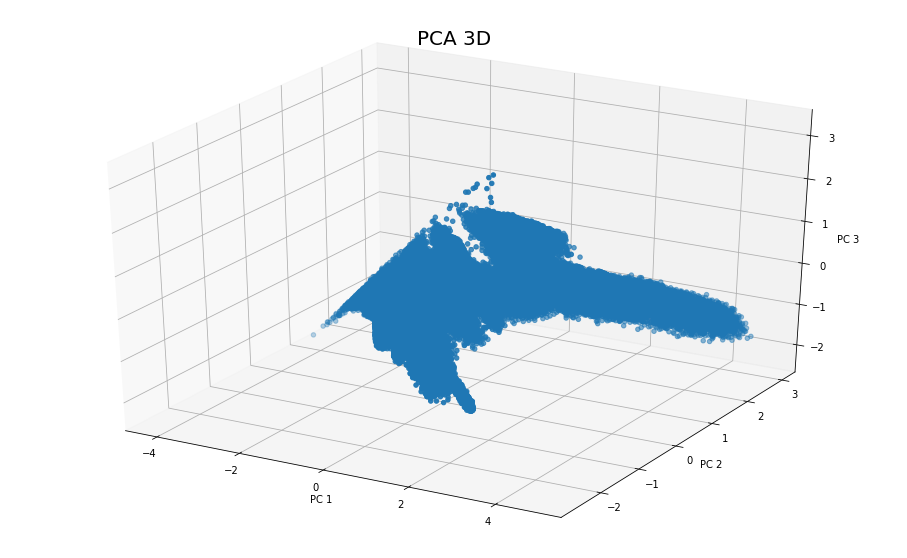

NameError: name 'ax4' is not defined

In [72]:
eigenPCAFull3D(Y,'Full')

In [ ]:
eigenPCA6D(X,'Full')

In [75]:
def gmm3D(sample,fileName):
    Y_std = StandardScaler().fit_transform(sample)
    Y_norm = Normalizer().fit_transform(sample)
    Y_zscore = stats.zscore(sample)
    cov_matY = np.cov(Y_zscore.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_matY)
    from sklearn.decomposition import PCA
    pcaY = PCA(n_components=3)
    principalComponentsY = pcaY.fit_transform(Y_std)
    principalDfY = pd.DataFrame(data = principalComponentsY
                 , columns = ['PC1', 'PC2','PC3'])
    gmm = GaussianMixture(n_components=25).fit(pd.DataFrame(principalDfY))
    labels = gmm.predict(pd.DataFrame(principalDfY))
    plt.scatter(principalDfY['PC1'], principalDfY['PC2'], c=labels, s=5,cmap='tab20c');
    file = fileName + '.csv'
    pd.DataFrame(labels).to_csv(file,index=False)

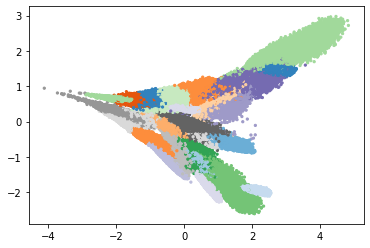

In [76]:
gmm3D(Y,'3D_cluster')

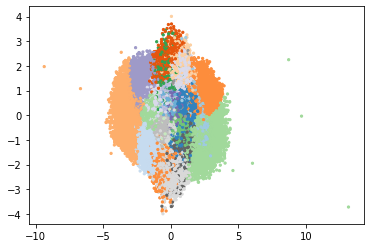

In [77]:
gmm3D(X,'6D_cluster')